<a href="https://colab.research.google.com/github/Mansi-2829/AIML---Capstone-Project-/blob/master/BERT_withUpsampling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#### Add your code here ####
%cd "/content/drive/My Drive/ColabData/NLP3"

/content/drive/My Drive/ColabData/NLP3


In [ ]:
#import tensorflow as tf

In [ ]:
#print(tf.__version__)

1.15.0


In [ ]:
!pip uninstall tensorflow==2.3.0

Uninstalling tensorflow-2.3.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.6/dist-packages/tensorflow-2.3.0.dist-info/*
    /usr/local/lib/python3.6/dist-packages/tensorflow/*
Proceed (y/n)? y
  Successfully uninstalled tensorflow-2.3.0


In [ ]:
!pip install tensorflow==1.15.0

Processing /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd/gast-0.2.2-cp36-none-any.whl
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.2
    Uninstalling gast-0.3.2:
      Successfully uninstalled gast-0.3.2


In [ ]:
#!pip uninstall bert-tensorflow

Uninstalling bert-tensorflow-1.0.1:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/bert/*
    /usr/local/lib/python3.6/dist-packages/bert_tensorflow-1.0.1.dist-info/*
Proceed (y/n)? y
  Successfully uninstalled bert-tensorflow-1.0.1


In [ ]:
!pip install bert-tensorflow==1.0.1

In [ ]:
!pip install ftfy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
##Pre-Processing label Encoding on  Assignment Group
import seaborn as sns
plt.style.use('ggplot')
%matplotlib inline

import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
from datetime import datetime
from sklearn.model_selection import train_test_split
import os
import tensorflow as tf

In [ ]:
#Importing BERT modules
import bert
from bert import run_classifier
from bert import optimization
from bert import tokenization

In [ ]:
inputPath=r"input_data.xlsx"

OUTPUT_DIR =r"BERT_1_exp"

DO_DELETE = False 

if DO_DELETE:
  try:
    tf.gfile.DeleteRecursively(OUTPUT_DIR)
  except:
    pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))


df = pd.read_excel(inputPath)
df1 = df.drop('Caller',axis=1)
df1['Short description'].fillna(value=" ",inplace=True)
df1['Description'].fillna(value = " ",inplace=True)

df1['New Description'] = df1['Short description'] + ' ' +df1['Description']
# Displaying the Duplicate recors in the dataframe

df_copy = df1[['Short description', 'Description','Assignment group','New Description']].copy()
duplicateRowsDF = df_copy[df_copy.duplicated()]
duplicateRowsDF

# Removing Duplicate records 

df_updt =df1.drop_duplicates(['Short description', 'Description', 'Assignment group','New Description'])

#Displaying the shape of the dataframe after removing the duplicate records

from ftfy import *
val = df_updt.loc[: ,'New Description']
df_updt['New Description'] = val.apply(fix_text)
#After using fify.fix_text on the given dataframe
df_updt["New Description"][186]

# Defining various function for cleaning the data 

import re  
#Remove numbers(integers)

def removeNumbers(text):
    text = ''.join([i for i in text if not i.isdigit()])         
    return text

#Replace Contractions

contraction_patterns = [ (r'won\'t', 'will not'),(r'didn\'t', 'did not'),(r'didnt', 'did not'), (r'can\'t', 'cannot'),(r'cant', 'cannot'), (r'i\'m', 'i am'), (r'ain\'t', 'is not'), (r'(\w+)\'ll', '\g<1> will'), (r'(\w+)n\'t', '\g<1> not'),
                         (r'(\w+)\'ve', '\g<1> have'), (r'(\w+)\'s', '\g<1> is'), (r'(\w+)\'re', '\g<1> are'), (r'(\w+)\'d', '\g<1> would'), (r'&', 'and'), (r'dammit', 'damn it'), (r'dont', 'do not'), (r'wont', 'will not') ]

def replaceContraction(text):
    patterns = [(re.compile(regex), repl) for (regex, repl) in contraction_patterns]
    for (pattern, repl) in patterns:
        (text, count) = re.subn(pattern, repl, text)
    return text


#Remove mail related words
       
def clean_data(text):
    text = re.sub(r"received from:",' ',text)
    text = re.sub(r"from:",' ',text)
    text = re.sub(r"to:",' ',text)
    text = re.sub(r"subject:",' ',text)
    text = re.sub(r"sent:",' ',text)
    text = re.sub(r"ic:",' ',text)
    text = re.sub(r"cc:",' ',text)
    text = re.sub(r"bcc:",' ',text)
    text = re.sub(r"hi",' ',text)
    text = re.sub(r"hello",' ',text)
    text = re.sub(r"com",' ',text)
    text = re.sub(r"gmail",' ',text)
    #Remove email 
    text = re.sub(r'\S*@\S*\s?', '', text)
    # Remove new line characters 
    text = re.sub(r'\n',' ',text)
    # Remove hashtag while keeping hashtag text
    text = re.sub(r'#','', text)
    #& 
    text = re.sub(r'&;?', 'and',text)
    # Remove HTML special entities (e.g. &amp;)
    text = re.sub(r'\&\w*;', '', text)
    # Remove hyperlinks
    text = re.sub(r'https?:\/\/.*\/\w*', '', text)  
    # Remove characters beyond Readable formart by Unicode:
    text= ''.join(c for c in text if c <= '\uFFFF') 
    text = text.strip()
    # Remove unreadable characters  (also extra spaces)
    text = ' '.join(re.sub("[^\u0030-\u0039\u0041-\u005a\u0061-\u007a]", " ", text).split())
    
    return text
  


def cleandata(text):
    # remove numbers
    text = removeNumbers(text)
    
    #remove punctuations
    text = re.sub(r"\W", " ", text, flags=re.I)
    text = text.replace('_',' ')
    
    #replace contractions
    text = replaceContraction(text)
      
    #convert to lower case
    text = text.lower()
    
    #remove mail related words
    text = clean_data(text)
            
    return text

df_updt["New Description"] = val.apply(cleandata)


df_updt.drop(['Short description','Description'],axis='columns', inplace=True)
df_updt.head()





***** Model output directory: BERT_1_exp *****


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:118: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c

,Assignment group,New Description
0,GRP_0,login issue verified user details employee man...
1,GRP_0,outlook received from hmjdrvpb komuaywn team m...
2,GRP_0,cannot log in to vpn received from eylqgodm yb...
3,GRP_0,unable to access hr tool page unable to access...
4,GRP_0,skype error skype error


In [ ]:
df_updt['Assignment group'].value_counts()

GRP_0     3429
GRP_8      645
GRP_24     285
GRP_12     256
GRP_9      252
GRP_2      241
GRP_19     214
GRP_3      200
GRP_6      183
GRP_13     145
GRP_10     140
GRP_5      128
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4       99
GRP_29      97
GRP_18      88
GRP_16      85
GRP_31      69
GRP_7       68
GRP_17      68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_30      39
GRP_15      38
GRP_42      37
GRP_20      36
GRP_45      35
GRP_22      31
GRP_1       31
GRP_11      30
GRP_21      28
GRP_47      27
GRP_48      25
GRP_62      25
GRP_23      25
GRP_39      19
GRP_27      18
GRP_37      16
GRP_60      16
GRP_44      15
GRP_36      15
GRP_50      14
GRP_53      11
GRP_65      11
GRP_52       9
GRP_55       8
GRP_51       8
GRP_46       6
GRP_59       6
GRP_49       6
GRP_43       5
GRP_66       4
GRP_32       4
GRP_56       3
GRP_68       3
GRP_63       3
GRP_38       3
GRP_58       3
GRP_54       2
GRP_71       2
GRP_69       2
GRP_57    

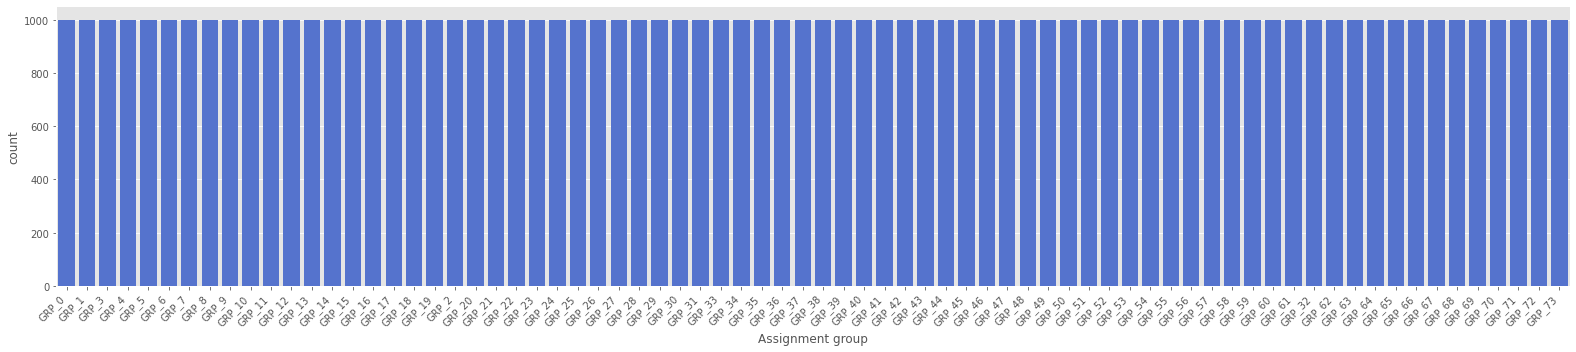

In [ ]:
from sklearn.utils import resample
maxOthers = 1000

df_updt_resampled = df_updt[0:0]
for grp in df_updt['Assignment group'].unique():
    df_updt_GrpDF = df_updt[df_updt['Assignment group'] == grp]
    resampled = resample(df_updt_GrpDF, replace=True, n_samples=int(maxOthers), random_state=123)
    df_updt_resampled = df_updt_resampled.append(resampled)

descending_order = df_updt_resampled['Assignment group'].value_counts().sort_values(ascending=False).index
plt.subplots(figsize=(22,5))
#add code to rotate the labels
ax=sns.countplot(x='Assignment group', data=df_updt_resampled, color='royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()
plt.show()

tensorflow version :  1.15.0
tensorflow_hub version :  0.9.0
Training Set Shape : (59200, 2)
Validation Set Shape : (14800, 2)


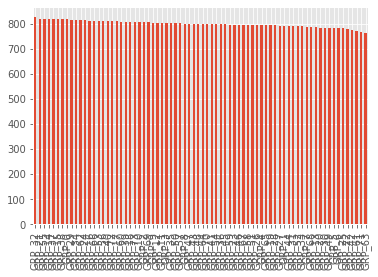

In [ ]:





print("tensorflow version : ", tf.__version__)
print("tensorflow_hub version : ", hub.__version__)


train, val =  train_test_split(df_updt_resampled, test_size = 0.2, random_state = 100)

print("Training Set Shape :", train.shape)
print("Validation Set Shape :", val.shape)


#Features in the dataset
train.columns


#unique classes
train['Assignment group'].unique()

#Distribution of classes
train['Assignment group'].value_counts().plot(kind = 'bar')




In [ ]:
###############################BERT#################################3

LABEL_COLUMN='Assignment group'
DATA_COLUMN ='New Description'

train_InputExamples = train.apply(lambda x: bert.run_classifier.InputExample(guid=None,
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)
val_InputExamples = val.apply(lambda x: bert.run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

train_InputExamples


print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)


# This is a path to an uncased (all lowercase) version of BERT
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
      vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
  return bert.tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()



print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

# We'll set sequences to be at most 128 tokens long.
MAX_SEQ_LENGTH = 128


label_list =train['Assignment group'].unique()




# Convert our train and validation features to InputFeatures that BERT understands.
train_features = bert.run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = bert.run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)


#Example on first observation in the training set
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)


def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
  bert_module = hub.Module(
      BERT_MODEL_HUB,
      trainable=True)
  bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
  bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

  # Use "pooled_output" for classification tasks on an entire sentence.
  # Use "sequence_outputs" for token-level output.
  output_layer = bert_outputs["pooled_output"]

  hidden_size = output_layer.shape[-1].value

  # Create our own layer to tune for politeness data.
  output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

  output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

  with tf.variable_scope("loss"):

    # Dropout helps prevent overfitting
    output_layer = tf.nn.dropout(output_layer, keep_prob=0.9)

    logits = tf.matmul(output_layer, output_weights, transpose_b=True)
    logits = tf.nn.bias_add(logits, output_bias)
    log_probs = tf.nn.log_softmax(logits, axis=-1)

    # Convert labels into one-hot encoding
    one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

    predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
    # If we're predicting, we want predicted labels and the probabiltiies.
    if is_predicting:
      return (predicted_labels, log_probs)

    # If we're train/eval, compute loss between predicted and actual label
    per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
    loss = tf.reduce_mean(per_example_loss)
    return (loss, predicted_labels, log_probs)


def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
  """Returns `model_fn` closure for TPUEstimator."""
  def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
    """The `model_fn` for TPUEstimator."""

    input_ids = features["input_ids"]
    input_mask = features["input_mask"]
    segment_ids = features["segment_ids"]
    label_ids = features["label_ids"]

    is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)
    
    # TRAIN and EVAL
    if not is_predicting:

      (loss, predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      train_op = bert.optimization.create_optimizer(
          loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

      # Calculate evaluation metrics. 
      def metric_fn(label_ids, predicted_labels):
        accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
        true_pos = tf.metrics.true_positives(
            label_ids,
            predicted_labels)
        true_neg = tf.metrics.true_negatives(
            label_ids,
            predicted_labels)   
        false_pos = tf.metrics.false_positives(
            label_ids,
            predicted_labels)  
        false_neg = tf.metrics.false_negatives(
            label_ids,
            predicted_labels)
        
        return {
            "eval_accuracy": accuracy,
            "true_positives": true_pos,
            "true_negatives": true_neg,
            "false_positives": false_pos,
            "false_negatives": false_neg
            }

      eval_metrics = metric_fn(label_ids, predicted_labels)

      if mode == tf.estimator.ModeKeys.TRAIN:
        return tf.estimator.EstimatorSpec(mode=mode,
          loss=loss,
          train_op=train_op)
      else:
          return tf.estimator.EstimatorSpec(mode=mode,
            loss=loss,
            eval_metric_ops=eval_metrics)
    else:
      (predicted_labels, log_probs) = create_model(
        is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

      predictions = {
          'probabilities': log_probs,
          'labels': predicted_labels
      }
      return tf.estimator.EstimatorSpec(mode, predictions=predictions)

  # Return the actual model function in the closure
  return model_fn


Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  job bkbackup tool powder prod full failed in job scheduler at received from monitoring tool pany job bkbackup tool powder prod full failed in job scheduler at

__________
Row 0 - text_b of training set :  None

__________
Row 0 - label of training set :  GRP_8
INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


['job', 'bk', '##back', '##up', 'tool', 'powder', 'pro', '##d', 'full', 'failed', 'in', 'job', 'schedule', '##r', 'at', 'received', 'from', 'monitoring', 'tool', 'pan', '##y', 'job', 'bk', '##back', '##up', 'tool', 'powder', 'pro', '##d', 'full', 'failed', 'in', 'job', 'schedule', '##r', 'at']
INFO:tensorflow:Writing example 0 of 59200


INFO:tensorflow:Writing example 0 of 59200


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] job bk ##back ##up tool powder pro ##d full failed in job schedule ##r at received from monitoring tool pan ##y job bk ##back ##up tool powder pro ##d full failed in job schedule ##r at [SEP]


INFO:tensorflow:tokens: [CLS] job bk ##back ##up tool powder pro ##d full failed in job schedule ##r at received from monitoring tool pan ##y job bk ##back ##up tool powder pro ##d full failed in job schedule ##r at [SEP]


INFO:tensorflow:input_ids: 101 3105 23923 5963 6279 6994 9898 4013 2094 2440 3478 1999 3105 6134 2099 2012 2363 2013 8822 6994 6090 2100 3105 23923 5963 6279 6994 9898 4013 2094 2440 3478 1999 3105 6134 2099 2012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3105 23923 5963 6279 6994 9898 4013 2094 2440 3478 1999 3105 6134 2099 2012 2363 2013 8822 6994 6090 2100 3105 23923 5963 6279 6994 9898 4013 2094 2440 3478 1999 3105 6134 2099 2012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_8 (id = 0)


INFO:tensorflow:label: GRP_8 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] issue with sy ##man ##tec end ##point protection i have warning messages on my sy ##man ##tec end ##point protection icon on my task ##bar please see the attached document showing these messages [SEP]


INFO:tensorflow:tokens: [CLS] issue with sy ##man ##tec end ##point protection i have warning messages on my sy ##man ##tec end ##point protection icon on my task ##bar please see the attached document showing these messages [SEP]


INFO:tensorflow:input_ids: 101 3277 2007 25353 2386 26557 2203 8400 3860 1045 2031 5432 7696 2006 2026 25353 2386 26557 2203 8400 3860 12696 2006 2026 4708 8237 3531 2156 1996 4987 6254 4760 2122 7696 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3277 2007 25353 2386 26557 2203 8400 3860 1045 2031 5432 7696 2006 2026 25353 2386 26557 2203 8400 3860 12696 2006 2026 4708 8237 3531 2156 1996 4987 6254 4760 2122 7696 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_50 (id = 1)


INFO:tensorflow:label: GRP_50 (id = 1)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] cannot download or print drawings from er ##p net ##we ##aver summary i cannot download or print drawings from er ##p net ##we ##aver [SEP]


INFO:tensorflow:tokens: [CLS] cannot download or print drawings from er ##p net ##we ##aver summary i cannot download or print drawings from er ##p net ##we ##aver [SEP]


INFO:tensorflow:input_ids: 101 3685 8816 2030 6140 9254 2013 9413 2361 5658 8545 22208 12654 1045 3685 8816 2030 6140 9254 2013 9413 2361 5658 8545 22208 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3685 8816 2030 6140 9254 2013 9413 2361 5658 8545 22208 12654 1045 3685 8816 2030 6140 9254 2013 9413 2361 5658 8545 22208 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_3 (id = 2)


INFO:tensorflow:label: GRP_3 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] lab ##le dr ##uck ##er funk ##tion ##ier ##t nic ##ht lab ##le dr ##uck ##er in der end ##kon ##tro ##lle defense gi ##bt kei ##ne et ##ike ##tten aus [SEP]


INFO:tensorflow:tokens: [CLS] lab ##le dr ##uck ##er funk ##tion ##ier ##t nic ##ht lab ##le dr ##uck ##er in der end ##kon ##tro ##lle defense gi ##bt kei ##ne et ##ike ##tten aus [SEP]


INFO:tensorflow:input_ids: 101 6845 2571 2852 12722 2121 11962 3508 3771 2102 27969 11039 6845 2571 2852 12722 2121 1999 4315 2203 19648 13181 6216 3639 21025 19279 26679 2638 3802 17339 25970 17151 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 6845 2571 2852 12722 2121 11962 3508 3771 2102 27969 11039 6845 2571 2852 12722 2121 1999 4315 2203 19648 13181 6216 3639 21025 19279 26679 2638 3802 17339 25970 17151 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_33 (id = 3)


INFO:tensorflow:label: GRP_33 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] a link on an e mail says i am forbidden an e mail from it training has email nt ##s and tips under create signature it has a link pan ##y format ##hey ##wt ##ing standard that i am forbidden to see [SEP]


INFO:tensorflow:tokens: [CLS] a link on an e mail says i am forbidden an e mail from it training has email nt ##s and tips under create signature it has a link pan ##y format ##hey ##wt ##ing standard that i am forbidden to see [SEP]


INFO:tensorflow:input_ids: 101 1037 4957 2006 2019 1041 5653 2758 1045 2572 10386 2019 1041 5653 2013 2009 2731 2038 10373 23961 2015 1998 10247 2104 3443 8085 2009 2038 1037 4957 6090 2100 4289 14844 26677 2075 3115 2008 1045 2572 10386 2000 2156 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 1037 4957 2006 2019 1041 5653 2758 1045 2572 10386 2019 1041 5653 2013 2009 2731 2038 10373 23961 2015 1998 10247 2104 3443 8085 2009 2038 1037 4957 6090 2100 4289 14844 26677 2075 3115 2008 1045 2572 10386 2000 2156 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_70 (id = 4)


INFO:tensorflow:label: GRP_70 (id = 4)


INFO:tensorflow:Writing example 10000 of 59200


INFO:tensorflow:Writing example 10000 of 59200


INFO:tensorflow:Writing example 20000 of 59200


INFO:tensorflow:Writing example 20000 of 59200


INFO:tensorflow:Writing example 30000 of 59200


INFO:tensorflow:Writing example 30000 of 59200


INFO:tensorflow:Writing example 40000 of 59200


INFO:tensorflow:Writing example 40000 of 59200


INFO:tensorflow:Writing example 50000 of 59200


INFO:tensorflow:Writing example 50000 of 59200


INFO:tensorflow:Writing example 0 of 14800


INFO:tensorflow:Writing example 0 of 14800


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] unable to install cr ##m app on galaxy s user has a samsung galaxy s device with android as the os on it he wants to install and use the dynamics cr ##m app but that app requires android as a minimum [SEP]


INFO:tensorflow:tokens: [CLS] unable to install cr ##m app on galaxy s user has a samsung galaxy s device with android as the os on it he wants to install and use the dynamics cr ##m app but that app requires android as a minimum [SEP]


INFO:tensorflow:input_ids: 101 4039 2000 16500 13675 2213 10439 2006 9088 1055 5310 2038 1037 19102 9088 1055 5080 2007 11924 2004 1996 9808 2006 2009 2002 4122 2000 16500 1998 2224 1996 10949 13675 2213 10439 2021 2008 10439 5942 11924 2004 1037 6263 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4039 2000 16500 13675 2213 10439 2006 9088 1055 5310 2038 1037 19102 9088 1055 5080 2007 11924 2004 1996 9808 2006 2009 2002 4122 2000 16500 1998 2224 1996 10949 13675 2213 10439 2021 2008 10439 5942 11924 2004 1037 6263 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_63 (id = 15)


INFO:tensorflow:label: GRP_63 (id = 15)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] aw ticket no men ##ts added received from rep ##y ##za ##jo l ##x ##f ##wo ##py ##q i have ua ##cy ##lto ##e h ##x ##ga ##y ##cz ##eed in sid and it works now correctly the accounting documents were generated automatically without any errors i am app ##roving the change cid image p ##ng d ec ##d best [SEP]


INFO:tensorflow:tokens: [CLS] aw ticket no men ##ts added received from rep ##y ##za ##jo l ##x ##f ##wo ##py ##q i have ua ##cy ##lto ##e h ##x ##ga ##y ##cz ##eed in sid and it works now correctly the accounting documents were generated automatically without any errors i am app ##roving the change cid image p ##ng d ec ##d best [SEP]


INFO:tensorflow:input_ids: 101 22091 7281 2053 2273 3215 2794 2363 2013 16360 2100 4143 5558 1048 2595 2546 12155 7685 4160 1045 2031 25423 5666 23223 2063 1044 2595 3654 2100 27966 13089 1999 15765 1998 2009 2573 2085 11178 1996 9529 5491 2020 7013 8073 2302 2151 10697 1045 2572 10439 22046 1996 2689 28744 3746 1052 3070 1040 14925 2094 2190 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 22091 7281 2053 2273 3215 2794 2363 2013 16360 2100 4143 5558 1048 2595 2546 12155 7685 4160 1045 2031 25423 5666 23223 2063 1044 2595 3654 2100 27966 13089 1999 15765 1998 2009 2573 2085 11178 1996 9529 5491 2020 7013 8073 2302 2151 10697 1045 2572 10439 22046 1996 2689 28744 3746 1052 3070 1040 14925 2094 2190 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_18 (id = 35)


INFO:tensorflow:label: GRP_18 (id = 35)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] reset password ##s for cp ##maid ##h ##j el ##ba ##q ##mt ##p using password management tool password reset the [SEP]


INFO:tensorflow:tokens: [CLS] reset password ##s for cp ##maid ##h ##j el ##ba ##q ##mt ##p using password management tool password reset the [SEP]


INFO:tensorflow:input_ids: 101 25141 20786 2015 2005 18133 28478 2232 3501 3449 3676 4160 20492 2361 2478 20786 2968 6994 20786 25141 1996 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 25141 20786 2015 2005 18133 28478 2232 3501 3449 3676 4160 20492 2361 2478 20786 2968 6994 20786 25141 1996 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_17 (id = 72)


INFO:tensorflow:label: GRP_17 (id = 72)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] email delegation i would like to have tod ##thy ##d ren ##yt ##rner email forward ##ed to myself tod ##thy ##d has accepted the vs ##p and i will be assuming s duties [SEP]


INFO:tensorflow:tokens: [CLS] email delegation i would like to have tod ##thy ##d ren ##yt ##rner email forward ##ed to myself tod ##thy ##d has accepted the vs ##p and i will be assuming s duties [SEP]


INFO:tensorflow:input_ids: 101 10373 10656 1045 2052 2066 2000 2031 28681 16921 2094 14916 22123 18703 10373 2830 2098 2000 2870 28681 16921 2094 2038 3970 1996 5443 2361 1998 1045 2097 2022 10262 1055 5704 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 10373 10656 1045 2052 2066 2000 2031 28681 16921 2094 14916 22123 18703 10373 2830 2098 2000 2870 28681 16921 2094 2038 3970 1996 5443 2361 1998 1045 2097 2022 10262 1055 5704 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_26 (id = 19)


INFO:tensorflow:label: GRP_26 (id = 19)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] job job failed in job schedule ##r at received from monitoring tool pan ##y job job failed in job schedule ##r at [SEP]


INFO:tensorflow:tokens: [CLS] job job failed in job schedule ##r at received from monitoring tool pan ##y job job failed in job schedule ##r at [SEP]


INFO:tensorflow:input_ids: 101 3105 3105 3478 1999 3105 6134 2099 2012 2363 2013 8822 6994 6090 2100 3105 3105 3478 1999 3105 6134 2099 2012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3105 3105 3478 1999 3105 6134 2099 2012 2363 2013 8822 6994 6090 2100 3105 3105 3478 1999 3105 6134 2099 2012 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: GRP_57 (id = 52)


INFO:tensorflow:label: GRP_57 (id = 52)


INFO:tensorflow:Writing example 10000 of 14800


INFO:tensorflow:Writing example 10000 of 14800


Sentence :  job bkbackup tool powder prod full failed in job scheduler at received from monitoring tool pany job bkbackup tool powder prod full failed in job scheduler at
------------------------------
Tokens :  ['job', 'bk', '##back', '##up', 'tool', 'powder', 'pro', '##d', 'full', 'failed', 'in', 'job', 'schedule', '##r', 'at', 'received', 'from', 'monitoring', 'tool', 'pan', '##y', 'job', 'bk', '##back', '##up', 'tool', 'powder', 'pro', '##d', 'full', 'failed', 'in', 'job', 'schedule', '##r', 'at']
------------------------------
Input IDs :  [101, 3105, 23923, 5963, 6279, 6994, 9898, 4013, 2094, 2440, 3478, 1999, 3105, 6134, 2099, 2012, 2363, 2013, 8822, 6994, 6090, 2100, 3105, 23923, 5963, 6279, 6994, 9898, 4013, 2094, 2440, 3478, 1999, 3105, 6134, 2099, 2012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
# These hyperparameters are copied from this colab notebook (https://colab.sandbox.google.com/github/tensorflow/tpu/blob/master/tools/colab/bert_finetuning_with_cloud_tpus.ipynb)
BATCH_SIZE = 32
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 3.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [ ]:

"""
# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)
"""


#Initializing the model and the estimator
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})


# Create an input function for training. drop_remainder = True for using TPUs.
train_input_fn = bert.run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)


INFO:tensorflow:Using config: {'_model_dir': 'BERT_1_exp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa272681d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': 'BERT_1_exp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fa272681d30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [ ]:


#Training the model
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into BERT_1_exp/model.ckpt.


INFO:tensorflow:loss = 4.2812624, step = 0


INFO:tensorflow:loss = 4.2812624, step = 0


INFO:tensorflow:global_step/sec: 1.61283


INFO:tensorflow:global_step/sec: 1.61283


INFO:tensorflow:loss = 4.100463, step = 100 (62.004 sec)


INFO:tensorflow:loss = 4.100463, step = 100 (62.004 sec)


INFO:tensorflow:global_step/sec: 2.15701


INFO:tensorflow:global_step/sec: 2.15701


INFO:tensorflow:loss = 3.4217768, step = 200 (46.360 sec)


INFO:tensorflow:loss = 3.4217768, step = 200 (46.360 sec)


INFO:tensorflow:Saving checkpoints for 300 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 300 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.85565


INFO:tensorflow:global_step/sec: 1.85565


INFO:tensorflow:loss = 2.719396, step = 300 (53.891 sec)


INFO:tensorflow:loss = 2.719396, step = 300 (53.891 sec)


INFO:tensorflow:global_step/sec: 2.15721


INFO:tensorflow:global_step/sec: 2.15721


INFO:tensorflow:loss = 2.2901511, step = 400 (46.358 sec)


INFO:tensorflow:loss = 2.2901511, step = 400 (46.358 sec)


INFO:tensorflow:global_step/sec: 2.15791


INFO:tensorflow:global_step/sec: 2.15791


INFO:tensorflow:loss = 1.8928936, step = 500 (46.343 sec)


INFO:tensorflow:loss = 1.8928936, step = 500 (46.343 sec)


INFO:tensorflow:Saving checkpoints for 600 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 600 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.83806


INFO:tensorflow:global_step/sec: 1.83806


INFO:tensorflow:loss = 1.1566992, step = 600 (54.400 sec)


INFO:tensorflow:loss = 1.1566992, step = 600 (54.400 sec)


INFO:tensorflow:global_step/sec: 2.15821


INFO:tensorflow:global_step/sec: 2.15821


INFO:tensorflow:loss = 0.8925753, step = 700 (46.339 sec)


INFO:tensorflow:loss = 0.8925753, step = 700 (46.339 sec)


INFO:tensorflow:global_step/sec: 2.15748


INFO:tensorflow:global_step/sec: 2.15748


INFO:tensorflow:loss = 0.6430034, step = 800 (46.347 sec)


INFO:tensorflow:loss = 0.6430034, step = 800 (46.347 sec)


INFO:tensorflow:Saving checkpoints for 900 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 900 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.87824


INFO:tensorflow:global_step/sec: 1.87824


INFO:tensorflow:loss = 0.4406764, step = 900 (53.242 sec)


INFO:tensorflow:loss = 0.4406764, step = 900 (53.242 sec)


INFO:tensorflow:global_step/sec: 2.15889


INFO:tensorflow:global_step/sec: 2.15889


INFO:tensorflow:loss = 0.674132, step = 1000 (46.321 sec)


INFO:tensorflow:loss = 0.674132, step = 1000 (46.321 sec)


INFO:tensorflow:global_step/sec: 2.15666


INFO:tensorflow:global_step/sec: 2.15666


INFO:tensorflow:loss = 0.5497924, step = 1100 (46.369 sec)


INFO:tensorflow:loss = 0.5497924, step = 1100 (46.369 sec)


INFO:tensorflow:Saving checkpoints for 1200 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1200 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.839


INFO:tensorflow:global_step/sec: 1.839


INFO:tensorflow:loss = 0.36958033, step = 1200 (54.375 sec)


INFO:tensorflow:loss = 0.36958033, step = 1200 (54.375 sec)


INFO:tensorflow:global_step/sec: 2.15967


INFO:tensorflow:global_step/sec: 2.15967


INFO:tensorflow:loss = 0.67896765, step = 1300 (46.305 sec)


INFO:tensorflow:loss = 0.67896765, step = 1300 (46.305 sec)


INFO:tensorflow:global_step/sec: 2.15905


INFO:tensorflow:global_step/sec: 2.15905


INFO:tensorflow:loss = 0.29476357, step = 1400 (46.315 sec)


INFO:tensorflow:loss = 0.29476357, step = 1400 (46.315 sec)


INFO:tensorflow:Saving checkpoints for 1500 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1500 into BERT_1_exp/model.ckpt.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


INFO:tensorflow:global_step/sec: 1.85902


INFO:tensorflow:global_step/sec: 1.85902


INFO:tensorflow:loss = 0.50358987, step = 1500 (53.791 sec)


INFO:tensorflow:loss = 0.50358987, step = 1500 (53.791 sec)


INFO:tensorflow:global_step/sec: 2.15927


INFO:tensorflow:global_step/sec: 2.15927


INFO:tensorflow:loss = 0.20765579, step = 1600 (46.314 sec)


INFO:tensorflow:loss = 0.20765579, step = 1600 (46.314 sec)


INFO:tensorflow:global_step/sec: 2.15895


INFO:tensorflow:global_step/sec: 2.15895


INFO:tensorflow:loss = 0.1491627, step = 1700 (46.318 sec)


INFO:tensorflow:loss = 0.1491627, step = 1700 (46.318 sec)


INFO:tensorflow:Saving checkpoints for 1800 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 1800 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.85732


INFO:tensorflow:global_step/sec: 1.85732


INFO:tensorflow:loss = 0.18000422, step = 1800 (53.840 sec)


INFO:tensorflow:loss = 0.18000422, step = 1800 (53.840 sec)


INFO:tensorflow:global_step/sec: 2.15786


INFO:tensorflow:global_step/sec: 2.15786


INFO:tensorflow:loss = 0.038930062, step = 1900 (46.343 sec)


INFO:tensorflow:loss = 0.038930062, step = 1900 (46.343 sec)


INFO:tensorflow:global_step/sec: 2.16056


INFO:tensorflow:global_step/sec: 2.16056


INFO:tensorflow:loss = 0.25360665, step = 2000 (46.282 sec)


INFO:tensorflow:loss = 0.25360665, step = 2000 (46.282 sec)


INFO:tensorflow:Saving checkpoints for 2100 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2100 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88903


INFO:tensorflow:global_step/sec: 1.88903


INFO:tensorflow:loss = 0.12905908, step = 2100 (52.940 sec)


INFO:tensorflow:loss = 0.12905908, step = 2100 (52.940 sec)


INFO:tensorflow:global_step/sec: 2.15882


INFO:tensorflow:global_step/sec: 2.15882


INFO:tensorflow:loss = 0.22746702, step = 2200 (46.320 sec)


INFO:tensorflow:loss = 0.22746702, step = 2200 (46.320 sec)


INFO:tensorflow:global_step/sec: 2.15908


INFO:tensorflow:global_step/sec: 2.15908


INFO:tensorflow:loss = 0.034879886, step = 2300 (46.317 sec)


INFO:tensorflow:loss = 0.034879886, step = 2300 (46.317 sec)


INFO:tensorflow:Saving checkpoints for 2400 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2400 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.89214


INFO:tensorflow:global_step/sec: 1.89214


INFO:tensorflow:loss = 0.019325327, step = 2400 (52.848 sec)


INFO:tensorflow:loss = 0.019325327, step = 2400 (52.848 sec)


INFO:tensorflow:global_step/sec: 2.15913


INFO:tensorflow:global_step/sec: 2.15913


INFO:tensorflow:loss = 0.02674368, step = 2500 (46.318 sec)


INFO:tensorflow:loss = 0.02674368, step = 2500 (46.318 sec)


INFO:tensorflow:global_step/sec: 2.1609


INFO:tensorflow:global_step/sec: 2.1609


INFO:tensorflow:loss = 0.08205513, step = 2600 (46.275 sec)


INFO:tensorflow:loss = 0.08205513, step = 2600 (46.275 sec)


INFO:tensorflow:Saving checkpoints for 2700 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 2700 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.84729


INFO:tensorflow:global_step/sec: 1.84729


INFO:tensorflow:loss = 0.027704202, step = 2700 (54.135 sec)


INFO:tensorflow:loss = 0.027704202, step = 2700 (54.135 sec)


INFO:tensorflow:global_step/sec: 2.15763


INFO:tensorflow:global_step/sec: 2.15763


INFO:tensorflow:loss = 0.3185022, step = 2800 (46.344 sec)


INFO:tensorflow:loss = 0.3185022, step = 2800 (46.344 sec)


INFO:tensorflow:global_step/sec: 2.14594


INFO:tensorflow:global_step/sec: 2.14594


INFO:tensorflow:loss = 0.032940272, step = 2900 (46.602 sec)


INFO:tensorflow:loss = 0.032940272, step = 2900 (46.602 sec)


INFO:tensorflow:Saving checkpoints for 3000 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3000 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.86965


INFO:tensorflow:global_step/sec: 1.86965


INFO:tensorflow:loss = 0.3487267, step = 3000 (53.486 sec)


INFO:tensorflow:loss = 0.3487267, step = 3000 (53.486 sec)


INFO:tensorflow:global_step/sec: 2.16141


INFO:tensorflow:global_step/sec: 2.16141


INFO:tensorflow:loss = 0.11798129, step = 3100 (46.268 sec)


INFO:tensorflow:loss = 0.11798129, step = 3100 (46.268 sec)


INFO:tensorflow:global_step/sec: 2.16113


INFO:tensorflow:global_step/sec: 2.16113


INFO:tensorflow:loss = 0.17992736, step = 3200 (46.270 sec)


INFO:tensorflow:loss = 0.17992736, step = 3200 (46.270 sec)


INFO:tensorflow:Saving checkpoints for 3300 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3300 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.70141


INFO:tensorflow:global_step/sec: 1.70141


INFO:tensorflow:loss = 0.0109370705, step = 3300 (58.780 sec)


INFO:tensorflow:loss = 0.0109370705, step = 3300 (58.780 sec)


INFO:tensorflow:global_step/sec: 2.16022


INFO:tensorflow:global_step/sec: 2.16022


INFO:tensorflow:loss = 0.011424042, step = 3400 (46.288 sec)


INFO:tensorflow:loss = 0.011424042, step = 3400 (46.288 sec)


INFO:tensorflow:global_step/sec: 2.16116


INFO:tensorflow:global_step/sec: 2.16116


INFO:tensorflow:loss = 0.20394412, step = 3500 (46.270 sec)


INFO:tensorflow:loss = 0.20394412, step = 3500 (46.270 sec)


INFO:tensorflow:Saving checkpoints for 3600 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3600 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88245


INFO:tensorflow:global_step/sec: 1.88245


INFO:tensorflow:loss = 0.09054974, step = 3600 (53.121 sec)


INFO:tensorflow:loss = 0.09054974, step = 3600 (53.121 sec)


INFO:tensorflow:global_step/sec: 2.15035


INFO:tensorflow:global_step/sec: 2.15035


INFO:tensorflow:loss = 0.17285043, step = 3700 (46.504 sec)


INFO:tensorflow:loss = 0.17285043, step = 3700 (46.504 sec)


INFO:tensorflow:global_step/sec: 2.1541


INFO:tensorflow:global_step/sec: 2.1541


INFO:tensorflow:loss = 0.24292116, step = 3800 (46.421 sec)


INFO:tensorflow:loss = 0.24292116, step = 3800 (46.421 sec)


INFO:tensorflow:Saving checkpoints for 3900 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 3900 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.87976


INFO:tensorflow:global_step/sec: 1.87976


INFO:tensorflow:loss = 0.025482617, step = 3900 (53.198 sec)


INFO:tensorflow:loss = 0.025482617, step = 3900 (53.198 sec)


INFO:tensorflow:global_step/sec: 2.16011


INFO:tensorflow:global_step/sec: 2.16011


INFO:tensorflow:loss = 0.3773416, step = 4000 (46.299 sec)


INFO:tensorflow:loss = 0.3773416, step = 4000 (46.299 sec)


INFO:tensorflow:global_step/sec: 2.16066


INFO:tensorflow:global_step/sec: 2.16066


INFO:tensorflow:loss = 0.18786645, step = 4100 (46.278 sec)


INFO:tensorflow:loss = 0.18786645, step = 4100 (46.278 sec)


INFO:tensorflow:Saving checkpoints for 4200 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4200 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88102


INFO:tensorflow:global_step/sec: 1.88102


INFO:tensorflow:loss = 0.009758012, step = 4200 (53.162 sec)


INFO:tensorflow:loss = 0.009758012, step = 4200 (53.162 sec)


INFO:tensorflow:global_step/sec: 2.16072


INFO:tensorflow:global_step/sec: 2.16072


INFO:tensorflow:loss = 0.19655839, step = 4300 (46.284 sec)


INFO:tensorflow:loss = 0.19655839, step = 4300 (46.284 sec)


INFO:tensorflow:global_step/sec: 2.16118


INFO:tensorflow:global_step/sec: 2.16118


INFO:tensorflow:loss = 0.06518146, step = 4400 (46.271 sec)


INFO:tensorflow:loss = 0.06518146, step = 4400 (46.271 sec)


INFO:tensorflow:Saving checkpoints for 4500 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4500 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88674


INFO:tensorflow:global_step/sec: 1.88674


INFO:tensorflow:loss = 0.09771988, step = 4500 (53.001 sec)


INFO:tensorflow:loss = 0.09771988, step = 4500 (53.001 sec)


INFO:tensorflow:global_step/sec: 2.16117


INFO:tensorflow:global_step/sec: 2.16117


INFO:tensorflow:loss = 0.06591359, step = 4600 (46.269 sec)


INFO:tensorflow:loss = 0.06591359, step = 4600 (46.269 sec)


INFO:tensorflow:global_step/sec: 2.16058


INFO:tensorflow:global_step/sec: 2.16058


INFO:tensorflow:loss = 0.046663757, step = 4700 (46.284 sec)


INFO:tensorflow:loss = 0.046663757, step = 4700 (46.284 sec)


INFO:tensorflow:Saving checkpoints for 4800 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 4800 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.87701


INFO:tensorflow:global_step/sec: 1.87701


INFO:tensorflow:loss = 0.09890799, step = 4800 (53.280 sec)


INFO:tensorflow:loss = 0.09890799, step = 4800 (53.280 sec)


INFO:tensorflow:global_step/sec: 2.16015


INFO:tensorflow:global_step/sec: 2.16015


INFO:tensorflow:loss = 0.15382916, step = 4900 (46.288 sec)


INFO:tensorflow:loss = 0.15382916, step = 4900 (46.288 sec)


INFO:tensorflow:global_step/sec: 2.16098


INFO:tensorflow:global_step/sec: 2.16098


INFO:tensorflow:loss = 0.007904243, step = 5000 (46.275 sec)


INFO:tensorflow:loss = 0.007904243, step = 5000 (46.275 sec)


INFO:tensorflow:Saving checkpoints for 5100 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5100 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88547


INFO:tensorflow:global_step/sec: 1.88547


INFO:tensorflow:loss = 0.036998674, step = 5100 (53.040 sec)


INFO:tensorflow:loss = 0.036998674, step = 5100 (53.040 sec)


INFO:tensorflow:global_step/sec: 2.1606


INFO:tensorflow:global_step/sec: 2.1606


INFO:tensorflow:loss = 0.3628835, step = 5200 (46.280 sec)


INFO:tensorflow:loss = 0.3628835, step = 5200 (46.280 sec)


INFO:tensorflow:global_step/sec: 2.16044


INFO:tensorflow:global_step/sec: 2.16044


INFO:tensorflow:loss = 0.096319295, step = 5300 (46.288 sec)


INFO:tensorflow:loss = 0.096319295, step = 5300 (46.288 sec)


INFO:tensorflow:Saving checkpoints for 5400 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5400 into BERT_1_exp/model.ckpt.


INFO:tensorflow:global_step/sec: 1.88027


INFO:tensorflow:global_step/sec: 1.88027


INFO:tensorflow:loss = 0.102239005, step = 5400 (53.182 sec)


INFO:tensorflow:loss = 0.102239005, step = 5400 (53.182 sec)


INFO:tensorflow:global_step/sec: 2.1591


INFO:tensorflow:global_step/sec: 2.1591


INFO:tensorflow:loss = 0.009061628, step = 5500 (46.316 sec)


INFO:tensorflow:loss = 0.009061628, step = 5500 (46.316 sec)


INFO:tensorflow:Saving checkpoints for 5550 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Saving checkpoints for 5550 into BERT_1_exp/model.ckpt.


INFO:tensorflow:Loss for final step: 0.11001761.


INFO:tensorflow:Loss for final step: 0.11001761.


Training took time  0:46:45.596655


In [ ]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2020-10-30T10:13:59Z


INFO:tensorflow:Starting evaluation at 2020-10-30T10:13:59Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from BERT_1_exp/model.ckpt-5550


INFO:tensorflow:Restoring parameters from BERT_1_exp/model.ckpt-5550


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2020-10-30-10:15:51


INFO:tensorflow:Finished evaluation at 2020-10-30-10:15:51


INFO:tensorflow:Saving dict for global step 5550: eval_accuracy = 0.95493245, false_negatives = 1.0, false_positives = 95.0, global_step = 5550, loss = 0.12962137, true_negatives = 104.0, true_positives = 14600.0


INFO:tensorflow:Saving dict for global step 5550: eval_accuracy = 0.95493245, false_negatives = 1.0, false_positives = 95.0, global_step = 5550, loss = 0.12962137, true_negatives = 104.0, true_positives = 14600.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5550: BERT_1_exp/model.ckpt-5550


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5550: BERT_1_exp/model.ckpt-5550


{'eval_accuracy': 0.95493245,
 'false_negatives': 1.0,
 'false_positives': 95.0,
 'global_step': 5550,
 'loss': 0.12962137,
 'true_negatives': 104.0,
 'true_positives': 14600.0}

In [ ]:
lbl=list(label_list)

In [ ]:
def getPrediction(in_sentences):
  #A list to map the actual labels to the predictions
  labels = list(label_list)
  label_list_2 =list(range(0,74))

  #Transforming the test data into BERT accepted form
  input_examples = [run_classifier.InputExample(guid="", text_a = x, text_b = None, label = 0) for x in in_sentences] 
  
  #Creating input features for Test data
  input_features = run_classifier.convert_examples_to_features(input_examples, label_list_2, MAX_SEQ_LENGTH, tokenizer)

  #Predicting the classes 
  predict_input_fn = run_classifier.input_fn_builder(features=input_features, seq_length=MAX_SEQ_LENGTH, is_training=False, drop_remainder=False)
  predictions = estimator.predict(predict_input_fn)
  return [(sentence, prediction['probabilities'],prediction['labels'], labels[prediction['labels']]) for sentence, prediction in zip(in_sentences, predictions)]

In [ ]:
out_pred=getPrediction(["skype issue","unable to login hotmail","data back up for germany"])

INFO:tensorflow:Writing example 0 of 3


INFO:tensorflow:Writing example 0 of 3


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] sky ##pe issue [SEP]


INFO:tensorflow:tokens: [CLS] sky ##pe issue [SEP]


INFO:tensorflow:input_ids: 101 3712 5051 3277 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 3712 5051 3277 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] unable to log ##in hot ##mail [SEP]


INFO:tensorflow:tokens: [CLS] unable to log ##in hot ##mail [SEP]


INFO:tensorflow:input_ids: 101 4039 2000 8833 2378 2980 21397 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 4039 2000 8833 2378 2980 21397 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: 


INFO:tensorflow:guid: 


INFO:tensorflow:tokens: [CLS] data back up for germany [SEP]


INFO:tensorflow:tokens: [CLS] data back up for germany [SEP]


INFO:tensorflow:input_ids: 101 2951 2067 2039 2005 2762 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2951 2067 2039 2005 2762 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from BERT_1_exp/model.ckpt-5550


INFO:tensorflow:Restoring parameters from BERT_1_exp/model.ckpt-5550


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


In [ ]:
out_pred

[('skype issue', array([ -8.29623   ,  -7.086216  ,  -5.152675  ,  -6.5905476 ,
          -7.457882  ,  -3.840609  ,  -7.5751343 ,  -8.851022  ,
          -7.128983  ,  -2.3751988 ,  -8.504713  ,  -7.9747105 ,
          -6.774218  ,  -7.114681  ,  -8.197045  ,  -6.1555777 ,
          -6.1247787 ,  -7.4717665 ,  -8.047477  ,  -5.2639556 ,
          -7.107268  ,  -7.8365846 ,  -0.44614834,  -5.567294  ,
          -7.285023  ,  -7.060972  ,  -1.6740346 ,  -9.108556  ,
          -9.2405405 ,  -8.856591  ,  -7.5049973 ,  -8.636794  ,
          -7.222705  ,  -9.148251  ,  -8.931998  ,  -8.2087755 ,
          -8.088536  ,  -7.1057363 ,  -8.044669  ,  -7.8616223 ,
          -9.041071  ,  -8.392672  ,  -8.23549   ,  -7.8780084 ,
          -5.92769   ,  -6.677042  ,  -7.464181  ,  -6.8519554 ,
          -9.448401  ,  -7.6146445 ,  -6.461813  ,  -7.3935075 ,
          -7.846266  ,  -8.195062  ,  -8.088506  ,  -7.5977206 ,
          -7.5699778 ,  -8.333985  ,  -7.4476423 ,  -6.8067355 ,
          

In [ ]:
sent_id=0

print (out_pred[sent_id][0],':',out_pred[sent_id][3])

skype issue : GRP_31


Ref: 
•	https://searchenterpriseai.techtarget.com/definition/BERT-language-model
•	https://analyticsindiamag.com/step-by-step-guide-to-implement-multi-class-classification-with-bert-tensorflow/
•	https://www.analyticsvidhya.com/blog/2019/09/demystifying-bert-groundbreaking-nlp-framework/
•	http://jalammar.github.io/illustrated-bert/
